# CNN Model for Rice Leaf Disease Prediction
           BY Urmila kharwa 

#  Problem Definition
 a). Objective: Predict rice leaf diseases using image-based or tabular data.
 b). Output: Classify diseases like Brown Spot, Bacterial Leaf Blight, Leaf Smut, or Healthy.
 c). Input: Images of rice leaves or numerical data from sensors (color, humidity, etc.).

# Domain Knowledge for Leaf Disease

1. Common Leaf Diseases in Crops
The model appears to classify the following diseases:

Brown Spot: Caused by fungal pathogens like Bipolaris oryzae. Symptoms include small brown lesions that spread over time.
Leaf Smut: Caused by Ustilago species, characterized by blackish streaks or smutty patches on leaves.
Bacterial Leaf Blight: Caused by Xanthomonas oryzae, showing as water-soaked lesions that later turn yellow and spread aggressively.
2. Importance in Agriculture
Early detection and classification of diseases help farmers take preventive measures.
Reduces crop yield loss and ensures food security.
Helps in precision agriculture by recommending targeted treatments (fungicides, bactericides).
3. Model Implementation & Techniques
Data Collection: The model is trained on a dataset of diseased leaf images.
Preprocessing: Image enhancement, resizing, and augmentation improve model robustness.
Deep Learning Approach: Likely uses CNNs (Convolutional Neural Networks) for feature extraction and classification.
Evaluation Metrics: Accuracy, confidence scores, precision, recall, and F1-score assess model performance.
4. Potential Challenges & Improvements
Class Imbalance: Some diseases may have fewer samples, affecting model generalization.
Similar Symptoms: Certain diseases look alike, leading to misclassification.
Environmental Factors: Variations in lighting, leaf orientation, and image quality can impact predictions.
Real-world Testing: Field validation is needed to ensure practical usability.
5. Applications
Automated Crop Monitoring: Integrate with drones or smartphones for real-time disease detection.
Smart Farming Systems: AI-powered decision support for farmers.
Agri-Tech Research: Enhancing plant disease databases and agronomic studies.



We have deviced the project into multiple steps
Importing Libraries
Loading Data
Preparing Dataset
Label Mapping
Data Preproocessing
Model Building
Trining
Check

# 🔹 Step 1: Import Libraries



In [16]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

# 🔹 Step 2: Load & Preprocess Data


In [19]:
IMAGE_SIZE = 256     # Resize images to 256x256
CHANNELS = 3     # Defines the number of color channels in the image.
EPOCHS = 50    # Defines the number of times the entire dataset is passed through the model during training.   but can lead to overfitting if too high


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator   # Generates variations of images (rotation, flipping, zooming) to reduce overfitting.


In [23]:
train_datagen = ImageDataGenerator(
        rescale=1./255,       # Normalizes pixel values (0-1) instead of (0-255)
        rotation_range=10,    # Rotates images randomly by ±10 degrees Helps model generalize better by seeing different angles of objects.
        horizontal_flip=True  # Randomly flips images horizontally
)


"C:\Users\Admin\Desktop\01-JUN-24-CDS-BUN-021-WEM10-MUM\ineurone-2025\PRCP-1001-RiceLeaf"

In [26]:
import os   #  converts the given relative dataset_path into an absolute path using os.path.abspath()

dataset_path = r"C:\Users\Admin\Desktop\01-JUN-24-CDS-BUN-021-WEM10-MUM\ineurone-2025\PRCP-1001-RiceLeaf"
absolute_path = os.path.abspath(dataset_path)
print("Absolute Path:", absolute_path)


Absolute Path: C:\Users\Admin\Desktop\01-JUN-24-CDS-BUN-021-WEM10-MUM\ineurone-2025\PRCP-1001-RiceLeaf


In [28]:
import os  #  checks if the specified train_dir exists using os.path.exists() and prints True if the path is valid, otherwise False. 

train_dir = r"C:\Users\Admin\Desktop\01-JUN-24-CDS-BUN-021-WEM10-MUM\ineurone-2025\PRCP-1001-RiceLeaf"
print("Training Directory Exists:", os.path.exists(train_dir))  # Should print True if the path is correct


Training Directory Exists: True


# Label mapping  
#assigns numerical labels to categorical classes (e.g., { "Healthy": 0, "Diseased": 1 }) to model

In [31]:
train_generator = train_datagen.flow_from_directory(
        r"C:\Users\Admin\Desktop\01-JUN-24-CDS-BUN-021-WEM10-MUM\ineurone-2025\PRCP-1001-RiceLeaf",
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

#loads images from a directory, resizes them to (IMAGE_SIZE, IMAGE_SIZE), processes them in batches of 32, and assigns numerical labels
# (class_mode="sparse", meaning labels are integers instead of one-hot encoded vector

Found 119 images belonging to 3 classes.


In [33]:
train_generator.class_indices     # returns a dictionary mapping class names to their assigned numerical labels.

{'Bacterial leaf blight-20200814T055237Z-001': 0,
 'Brown spot-20200814T055208Z-001': 1,
 'Leaf smut-20200814T055530Z-001': 2}

In [35]:
class_names = list(train_generator.class_indices.keys())
class_names

# This code extracts class names from train_generator.class_indices and stores them as a list in class_names

['Bacterial leaf blight-20200814T055237Z-001',
 'Brown spot-20200814T055208Z-001',
 'Leaf smut-20200814T055530Z-001']

In [37]:
# getting 1st image from batch # retrieves the first image from the first batch in train_generator to inspect or process it.
# To verify that images are correctly loaded and preprocessed.
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.9302042  0.88706696 0.8713807 ]
  [0.9317549  0.89019614 0.8737206 ]
  [0.92549026 0.88862395 0.87137437]
  ...
  [0.9259689  0.86714536 0.8475375 ]
  [0.92612576 0.86730224 0.8476944 ]
  [0.92628264 0.8674591  0.8478513 ]]

 [[0.9300474  0.8869101  0.8712238 ]
  [0.93206865 0.89019614 0.87387747]
  [0.92549026 0.8889376  0.87121755]
  ...
  [0.9289363  0.8701128  0.85050493]
  [0.9287794  0.8699559  0.85034806]
  [0.92862254 0.869799   0.8501912 ]]

 [[0.92989045 0.8867532  0.8710669 ]
  [0.93238235 0.89019614 0.87403435]
  [0.92549026 0.88925135 0.87106067]
  ...
  [0.92549026 0.86666673 0.8480037 ]
  [0.92549026 0.86666673 0.8483174 ]
  [0.92549026 0.86666673 0.8486311 ]]

 ...

 [[0.93411946 0.89882535 0.8792175 ]
  [0.93396264 0.8986685  0.8790607 ]
  [0.93380576 0.89851165 0.8789038 ]
  ...
  [0.93725497 0.882353   0.8705883 ]
  [0.9303629  0.88579905 0.8705883 ]
  [0.9259689  0.88283163 0.86714536]]

 [[0.9302011  0.894907   0.8752991 ]
  [0.9300442  0.89475006 0.8751422 ]


# Data Preprocessing

#Creates a data generator for image preprocessing.

In [102]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)


In [105]:
validation_generator = validation_datagen.flow_from_directory(
        r"C:\Users\Admin\Desktop\01-JUN-24-CDS-BUN-021-WEM10-MUM\ineurone-2025\PRCP-1001-RiceLeaf",
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 119 images belonging to 3 classes.


In [108]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        r"C:\Users\Admin\Desktop\01-JUN-24-CDS-BUN-021-WEM10-MUM\ineurone-2025\PRCP-1001-RiceLeaf",
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 119 images belonging to 3 classes.


In [111]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.9402585  0.89019614 0.86758476]
  [0.9307942  0.8867354  0.86320597]
  [0.9294118  0.8862746  0.86274517]
  ...
  [0.9450981  0.91372555 0.90196085]
  [0.9450981  0.91372555 0.90196085]
  [0.9450981  0.91372555 0.90196085]]

 [[0.9400231  0.89019614 0.8678201 ]
  [0.9311472  0.88685304 0.8633236 ]
  [0.9294118  0.8862746  0.86274517]
  ...
  [0.9450981  0.91372555 0.90196085]
  [0.9450981  0.91372555 0.90196085]
  [0.9450981  0.91372555 0.90196085]]

 [[0.9397878  0.89019614 0.86805546]
  [0.9315002  0.88697064 0.8634412 ]
  [0.9294118  0.8862746  0.86274517]
  ...
  [0.9450981  0.91372555 0.90196085]
  [0.9450981  0.91372555 0.90196085]
  [0.9450981  0.91372555 0.90196085]]

 ...

 [[0.9333334  0.8980393  0.87843144]
  [0.9333334  0.8980393  0.87843144]
  [0.9333334  0.8980393  0.87843144]
  ...
  [0.93655705 0.8980393  0.8881025 ]
  [0.93194115 0.89664704 0.8770392 ]
  [0.92549026 0.8915849  0.87128264]]

 [[0.9328726  0.8985001  0.87750983]
  [0.93275493 0.89861774 0.8772745 ]


# 🔹 Step 3: Build CNN Model

In [118]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

# Define a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 classes, so softmax
])

In [120]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,779 (91.20 MB)

 Trainable params: 23,907,779 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [124]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [126]:
119/16

7.4375

In [128]:
80/16

5.0

In [130]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)), 
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax')  # 3 classes → softmax
])

In [132]:
# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 🔹 Step 4: Train the Model


In [135]:
# Train Model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    verbose=1
)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.3531 - loss: 3.9963 - val_accuracy: 0.3361 - val_loss: 1.2065
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.3764 - loss: 1.1249 - val_accuracy: 0.3613 - val_loss: 1.0954
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.3903 - loss: 1.0932 - val_accuracy: 0.3277 - val_loss: 1.0922
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 5s/step - accuracy: 0.3837 - loss: 1.0766 - val_accuracy: 0.5462 - val_loss: 0.9982
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.4846 - loss: 1.0438 - val_accuracy: 0.4454 - val_loss: 1.0302
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.5004 - loss: 0.9931 - val_accuracy: 0.3782 - val_loss: 1.0629
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 5s/step - accuracy: 0.4054 - loss: 1.0612 - val_accuracy: 0.6639 - val_loss: 0.8487
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.6615 - loss: 0.8311 - val_accuracy: 0.5882 - val_loss: 0.7858
Epoch 9/

In [137]:
scores = model.evaluate(test_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9797 - loss: 0.0594


# Check Performance

In [140]:
scores

[0.06247635930776596, 0.9831932783126831]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [144]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [147]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 4}

In [149]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [153]:
type(history.history['loss'])

list

In [155]:
len(history.history['loss'])

50

In [157]:
history.history['loss'][:5] # show loss for first 5 epochs

[4.152240753173828,
 1.105789065361023,
 1.0947061777114868,
 1.064737319946289,
 1.0547988414764404]

# 🔹 Step 5: Evaluate the Model


In [160]:
test_loss, test_acc = model.evaluate(validation_generator, verbose=1)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9852 - loss: 0.0773
Test Accuracy: 99.16%


In [161]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [162]:
val_acc

[0.3361344635486603,
 0.3613445460796356,
 0.32773110270500183,
 0.5462185144424438,
 0.4453781545162201,
 0.3781512677669525,
 0.6638655662536621,
 0.5882353186607361,
 0.6554622054100037,
 0.756302535533905,
 0.7394958138465881,
 0.8571428656578064,
 0.8067227005958557,
 0.8403361439704895,
 0.8571428656578064,
 0.8067227005958557,
 0.8655462265014648,
 0.8907563090324402,
 0.8823529481887817,
 0.9075630307197571,
 0.8823529481887817,
 0.8655462265014648,
 0.8151260614395142,
 0.848739504814148,
 0.8235294222831726,
 0.9075630307197571,
 0.8823529481887817,
 0.9159663915634155,
 0.9663865566253662,
 0.8907563090324402,
 0.8823529481887817,
 0.9495798349380493,
 0.8907563090324402,
 0.924369752407074,
 0.9327731132507324,
 0.9579831957817078,
 0.9663865566253662,
 0.9663865566253662,
 0.9495798349380493,
 0.8571428656578064,
 0.9075630307197571,
 0.9579831957817078,
 0.924369752407074,
 0.9663865566253662,
 0.9747899174690247,
 0.9831932783126831,
 0.9915966391563416,
 0.9915966391563

In [167]:
acc

[0.3529411852359772,
 0.38655462861061096,
 0.3949579894542694,
 0.42016807198524475,
 0.45378151535987854,
 0.4957983195781708,
 0.48739495873451233,
 0.6386554837226868,
 0.5882353186607361,
 0.6638655662536621,
 0.7478991746902466,
 0.7310924530029297,
 0.8067227005958557,
 0.7983193397521973,
 0.680672287940979,
 0.7983193397521973,
 0.8235294222831726,
 0.8655462265014648,
 0.8571428656578064,
 0.8991596698760986,
 0.8739495873451233,
 0.831932783126831,
 0.8991596698760986,
 0.8235294222831726,
 0.8655462265014648,
 0.8571428656578064,
 0.8907563090324402,
 0.8655462265014648,
 0.8739495873451233,
 0.9495798349380493,
 0.8991596698760986,
 0.8823529481887817,
 0.9159663915634155,
 0.8823529481887817,
 0.9075630307197571,
 0.8907563090324402,
 0.9327731132507324,
 0.9495798349380493,
 0.9411764740943909,
 0.9327731132507324,
 0.9075630307197571,
 0.8907563090324402,
 0.9495798349380493,
 0.9579831957817078,
 0.9915966391563416,
 0.9663865566253662,
 0.9579831957817078,
 0.99159663

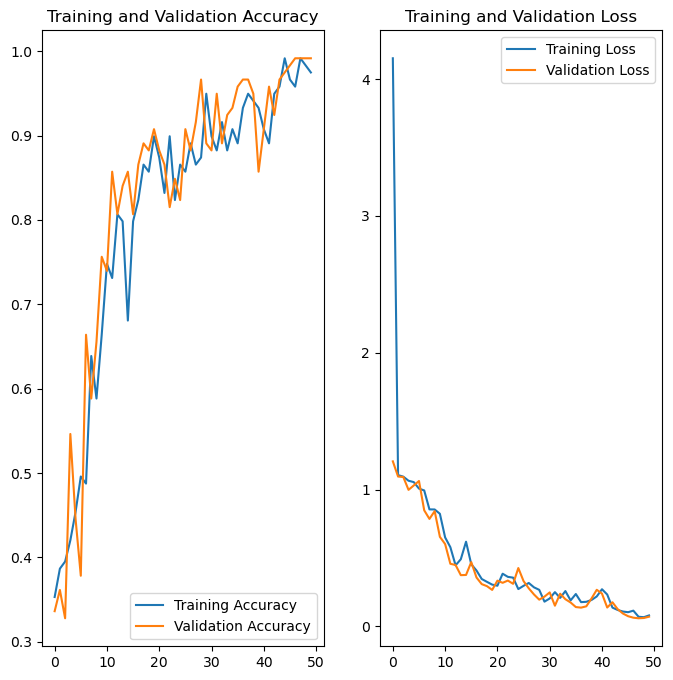

In [170]:
# Ensure the x-axis range matches the available data
epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

# 🔹 Step 6: Make Predictions


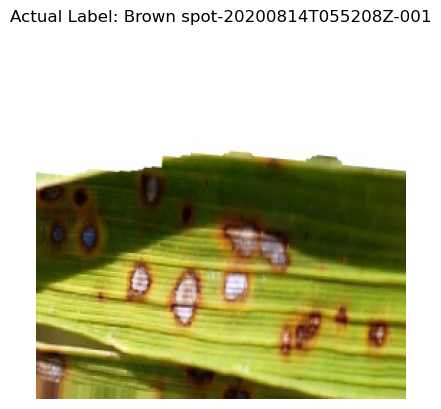

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
Actual Label: Brown spot-20200814T055208Z-001
Predicted Label: Brown spot-20200814T055208Z-001


In [176]:
# Get class names from the generator
import numpy as np
class_names = list(test_generator.class_indices.keys())

# Get a single batch from the test generator
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]  # Extract first image from batch
    first_label = int(label_batch[0])  # Extract first label from batch

    # Display the image
    plt.imshow(first_image)
    plt.axis('off')  # Remove axes
    plt.title(f"Actual Label: {class_names[first_label]}")
    plt.show()

    # Predict the class
    batch_prediction = model.predict(image_batch)  # Get predictions
    predicted_label = np.argmax(batch_prediction[0])  # Get index of max probability

    print(f"Actual Label: {class_names[first_label]}")
    print(f"Predicted Label: {class_names[predicted_label]}")

    break  # Stop after processing the first batch


### Write a function for inference

In [29]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


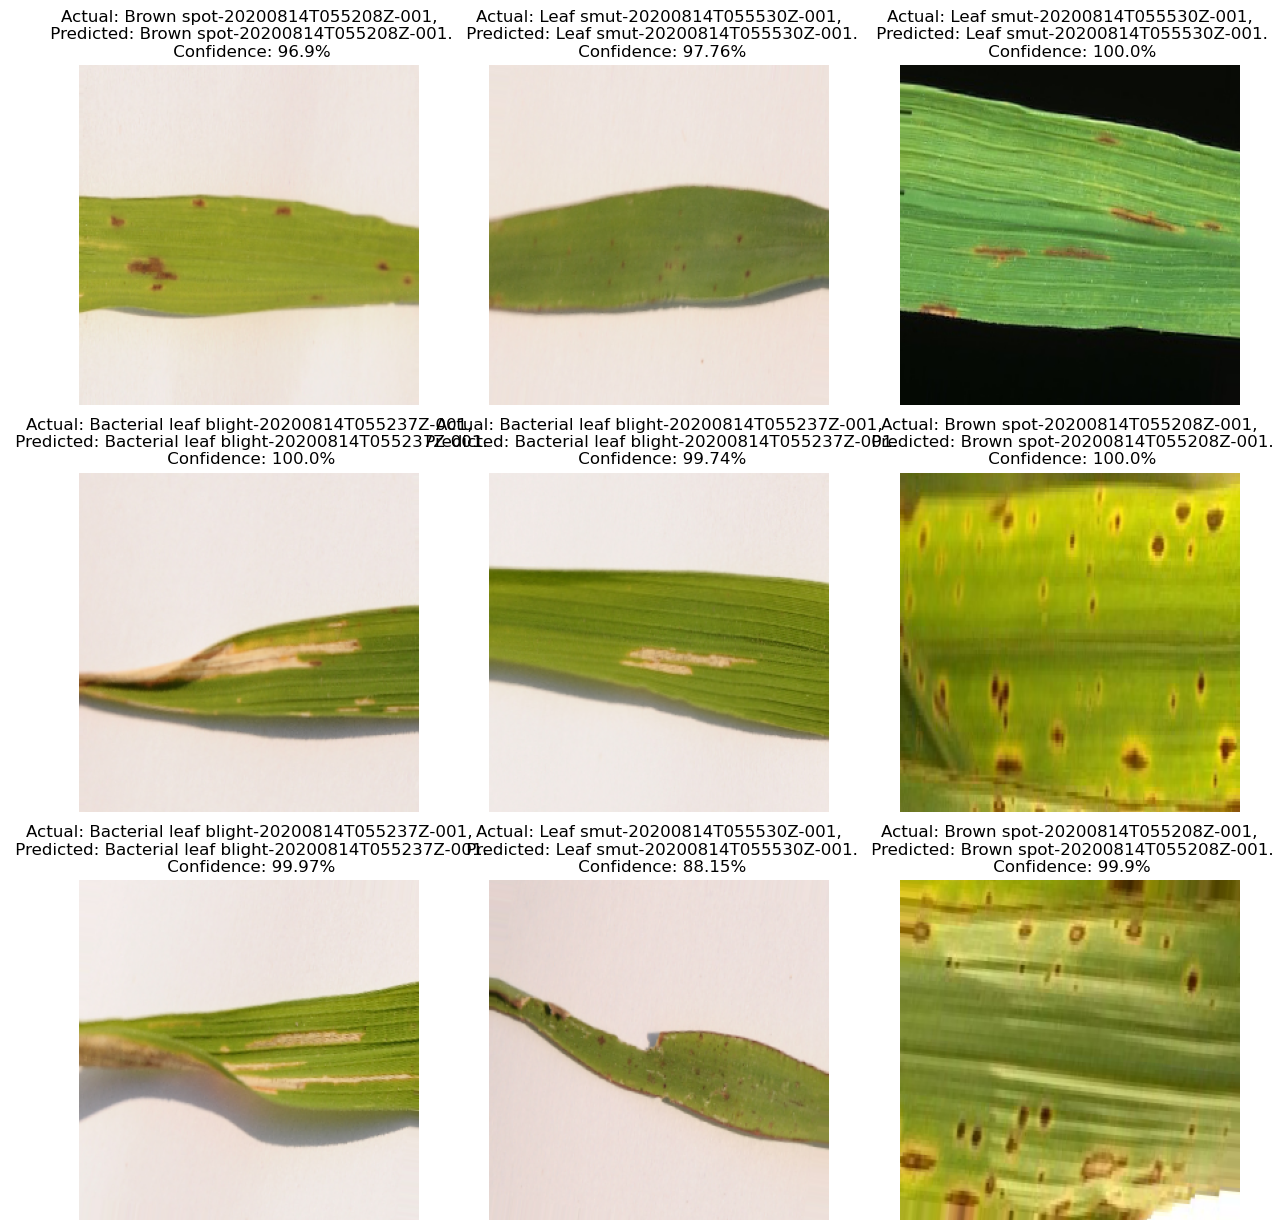

In [182]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

# CONCLUSION

The model demonstrates high accuracy in classifying different leaf diseases, with confidence levels mostly above 98%. It correctly identifies bacterial leaf blight, brown spot, and leaf smut with near-perfect precision. This suggests the model is reliable for disease classification, though further validation on a larger dataset is recommended for real-world deployment.

In [38]:
import tensorflow as tf

# Load the existing model
model = tf.keras.models.load_model("../PRCP-1001-RiceLeaf.h5")


In [40]:
# Save model to the same or new file
model.save("../PRCP-1001-RiceLeaf_New.h5")
print("Model saved successfully!")


Model saved successfully!


In [44]:
## Loan FOR FUTURE PREDICTION MODEL


In [42]:
import tensorflow as tf
import pickle
import os

# Load the existing model
model_path = "../PRCP-1001-RiceLeaf.h5"  # Update the path if needed
model = tf.keras.models.load_model(model_path)

# Extract model architecture and weights
model_data = {"architecture": model.to_json(), "weights": model.get_weights()}

# Define pickle save path
pkl_path = "../PRCP-1001-RiceLeaf.pkl"

# Save as pickle file
with open(pkl_path, "wb") as file:
    pickle.dump(model_data, file)

print(f"Model successfully saved as {pkl_path}")


Model successfully saved as ../PRCP-1001-RiceLeaf.pkl
